In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150   #data quality-pixels
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

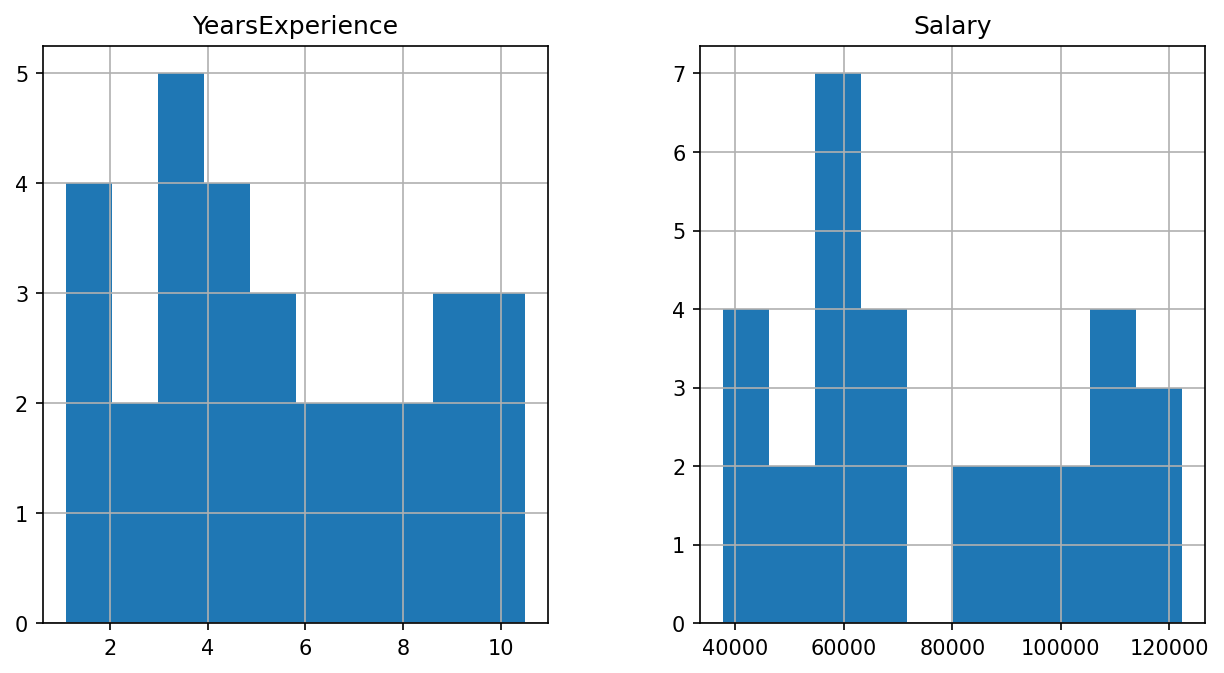

In [8]:
df.hist()

In [9]:
df.skew()    #moderate skeweness.

YearsExperience    0.37956
Salary             0.35412
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

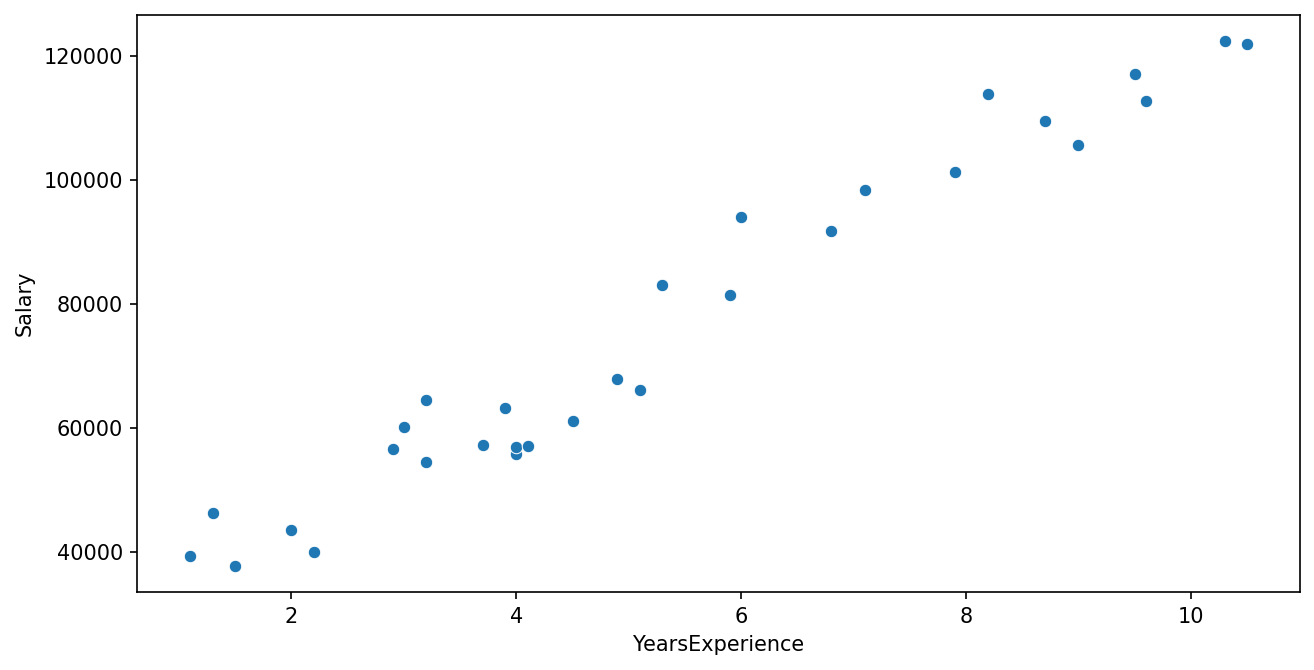

In [10]:
sns.scatterplot(x = df['YearsExperience'],y = df['Salary'])

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
#YearsExperience and Salary is approximately 0.9782. This indicates a very strong positive linear relationship between the two variables.

<AxesSubplot:>

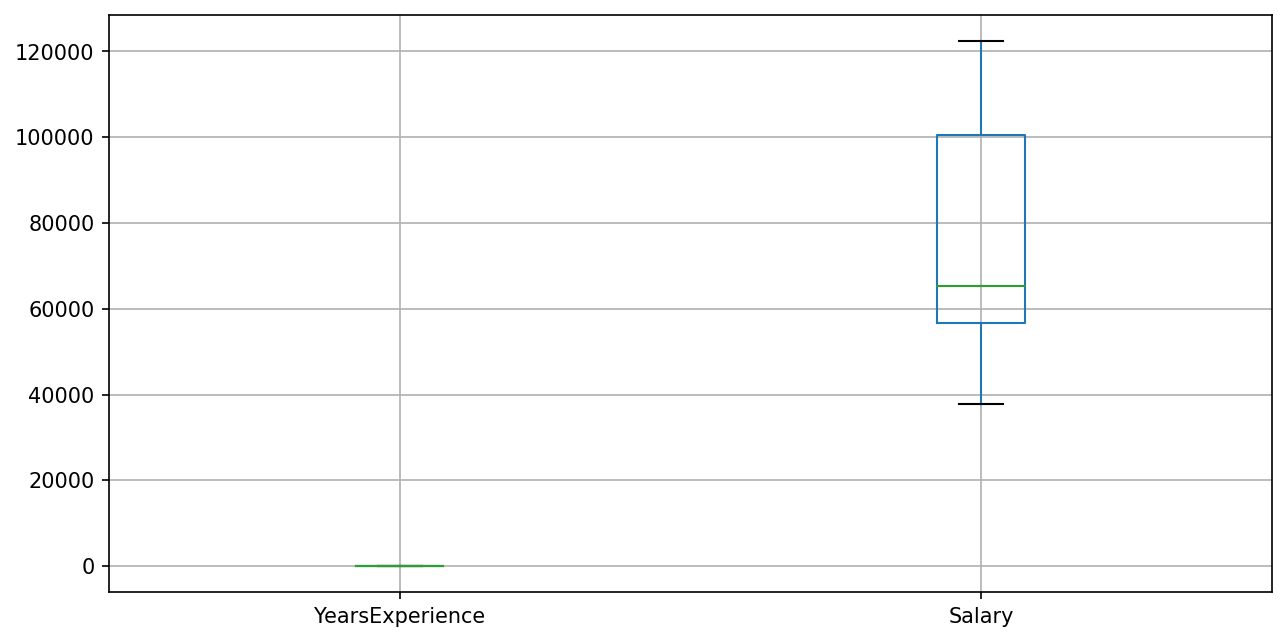

In [13]:
df.boxplot()

In [14]:
# NO outliers are present

# Log Transformation

In [15]:
#Log transformation is used to reduce skewness in the distribution of data. 
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [17]:
df['log_Salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


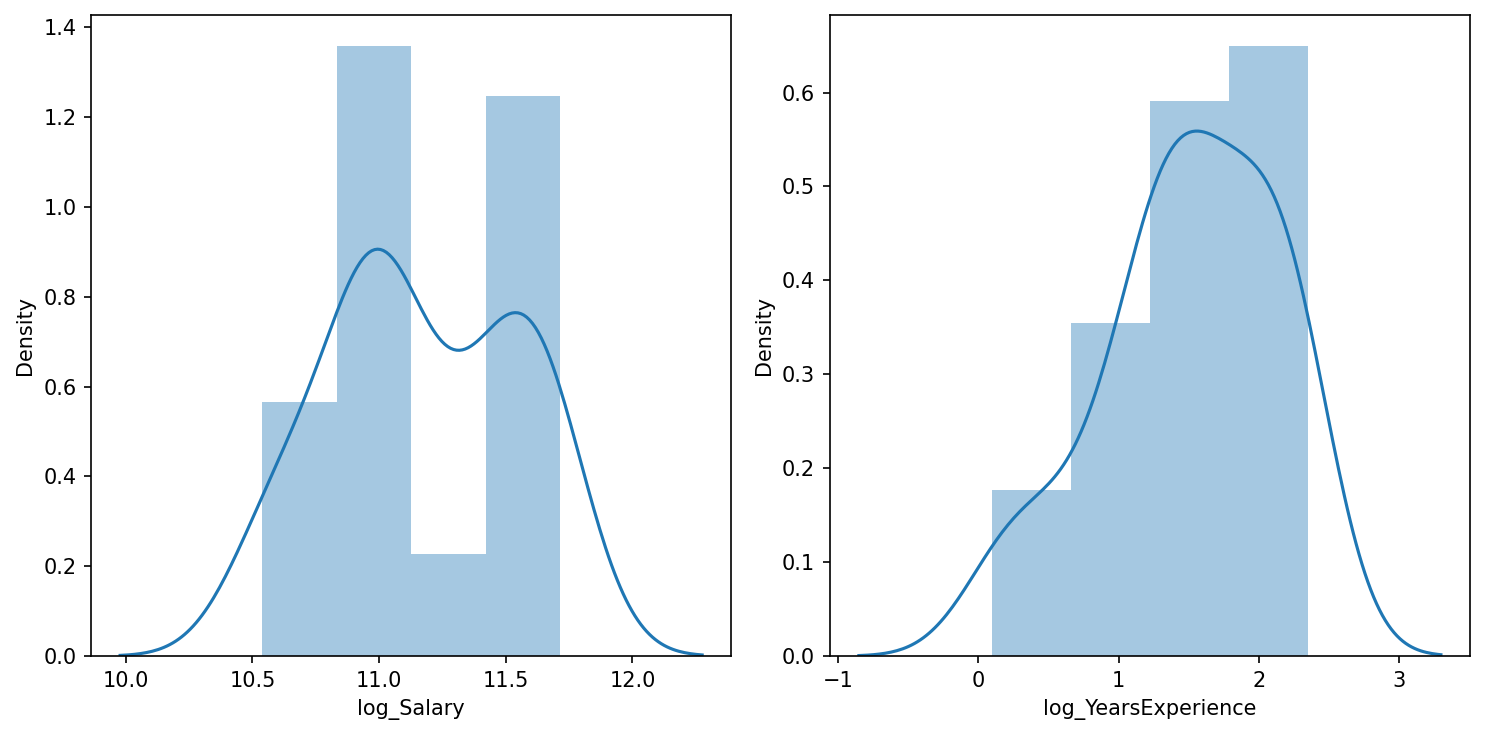

In [18]:
plt.subplot(1,2,2)
sns.distplot(df['log_YearsExperience'])

plt.subplot(1,2,1)  
sns.distplot(df['log_Salary'])

plt.tight_layout()

In [19]:
df['log_YearsExperience'].skew(), df['log_Salary'].skew()

(-0.6005648582626513, -0.044126086756988495)

In [20]:
#Model Building

In [21]:
import statsmodels.formula.api as smf

In [22]:
model = smf.ols('log_Salary~log_YearsExperience',data=df).fit()
model

In [23]:
model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [24]:
model.pvalues

Intercept              9.073132e-45
log_YearsExperience    7.395278e-16
dtype: float64

In [25]:
model.rsquared, model.rsquared_adj

(0.9052150725817149, 0.9018298966024904)

In [26]:
# 90% Accuracy